In [1]:
import numpy as np
import scipy.io
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import stats

In [2]:
os.chdir('/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/monkey_gf/data')
details = pd.read_csv('all_data.csv') 

In [52]:
os.chdir('/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/monkey_gf/data/eye_head/nrec')
final_df = pd.DataFrame({'filename': [], 'x_std_mean': [], 'x_values': [], 'cue': [], 'soa': [], 'baseline': []})

In [53]:
for file in os.listdir():
    if file in details['filename'].tolist():
        print(file)
        mat_name = str(file)
    else:
        continue
        
    mat = scipy.io.loadmat(mat_name)
    session = details[details['filename']==mat_name]
    
    num_trials = mat['num_trials'][0][0]
    num_samples = len(mat['EyeX'])
    sampling_rate = mat['samplingRate'][0][0] # Hz
    time_vec = np.arange(num_samples) / sampling_rate 
    
    soa = mat['TrialList'][:, 11] # stimulus onset asynchrony
    isi = mat['TrialList'][:, 12] # inter stimulus interval
    cue_onset = int((0.1 + 0.5) * sampling_rate) # index
    target_onset = (cue_onset + (session['soa']*1000)).tolist()
        
    valid = session[(session['response_from_tracking'] == 2) | (session['response_from_tracking'] == 6)].reset_index(drop=True)
    valid_trials = valid['trial_id'].tolist()
    invalid = session[(session['response_from_tracking'] != 2) & (session['response_from_tracking'] != 6)] 
    invalid_trials = invalid['trial_id'].tolist()
    
    correct = valid[valid['got_reward'] == 1]
    incorrect = valid[valid['got_reward'] != 1]
    incorrect_trials = incorrect['trial_id'].tolist()

    congruent = valid[valid['cue_lum_congruency'] == True] 
    congruent_trials = congruent['trial_id'].tolist()
    incongruent = valid[valid['cue_lum_congruency'] == False] 
    incongruent_trials = incongruent['trial_id'].tolist()
    
    valid_trials = [i for i in valid_trials if i not in incorrect_trials or i not in invalid_trials]
    print('Amount of valid trials:', len(valid_trials))
    
    right_cue_idx = [i for i, value in enumerate(session['cue_id']) if value == 2.0]
    left_cue_idx = [j for j, value in enumerate(session['cue_id']) if value == 6.0]
    
    ## Delete invalid trials
    for i in range(1, len(session)):
        if i in invalid_trials or i in incorrect_trials:
            if i in right_cue_idx:
                right_cue_idx.remove(i)
            elif i in left_cue_idx:
                left_cue_idx.remove(i)

            if i in congruent_trials:
                congruent_trials.remove(i)
            elif i in incongruent_trials:
                incongruent_trials.remove(i)

    # Eye data
    Xdata = mat['EyeX']
    Ydata = mat['EyeY']
    # Remove NaNs
    Xdata[np.isnan(Xdata)] = 0
    Ydata[np.isnan(Ydata)] = 0
    # Smooth
    Xdata_smoothed = savgol_filter(Xdata, 5, 2)
    Ydata_smoothed = savgol_filter(Ydata, 5, 2)
    
    valid['soa'] = valid['soa'] * 1000 # convert to ms
    
    # Standardize
    X_standard = []
    trial_info = []
    soa = []
    Xs = []
    stds = []
    baselines = []
    if len(valid)>50:
        for i in range(len(valid)):
            trial_id = int(valid['trial_id'][i])
            target_on = int(target_onset[trial_id-1])
            baseline = Xdata_smoothed[cue_onset-1:cue_onset, trial_id-1]
            baselines.append(baseline)
            X_s = Xdata_smoothed[target_on-50:target_on, trial_id-1]
            Xs.append(X_s)
            corr_X = X_s - baseline # standardization
            corr_X_mean = np.nanmean(corr_X)
            X_standard.append(corr_X_mean)
            trial_info.append(valid['cue_id'][i])
            soa.append(valid['soa'][i])
    
    print('Soas', np.unique(soa), '\n')
    
    temp_df = pd.DataFrame({'filename':[mat_name]*len(X_standard), 'x_std_mean': X_standard, 'x_values':Xs, 'cue':trial_info, 'soa':soa, 'baseline': baselines})
    final_df = pd.concat([final_df,temp_df])

Emil_LED26_2022-10-10-13-18-34-836.mat
Amount of valid trials: 11
Soas [] 

Emil_LED26_2022-10-10-13-21-31-925.mat
Amount of valid trials: 5
Soas [] 

Emil_LED26_2022-10-10-13-24-22-324.mat
Amount of valid trials: 23
Soas [] 

Emil_LED26_2022-10-10-13-32-33-628.mat
Amount of valid trials: 8
Soas [] 

Emil_LED26_2022-10-10-13-38-21-351.mat
Amount of valid trials: 7
Soas [] 

Emil_LED26_2022-10-10-13-42-06-833.mat
Amount of valid trials: 9
Soas [] 

Emil_LED26_2022-10-10-13-43-39-573.mat
Amount of valid trials: 6
Soas [] 

Emil_LED26_2022-10-10-13-50-31-348.mat
Amount of valid trials: 10
Soas [] 

Emil_LED26_2022-10-10-13-53-15-374.mat
Amount of valid trials: 5
Soas [] 

Emil_LED26_2022-10-10-13-56-16-058.mat
Amount of valid trials: 18
Soas [] 

Emil_LED26_2022-10-10-14-10-05-290.mat
Amount of valid trials: 13
Soas [] 

Emil_LED26_2022-10-10-14-11-52-887.mat
Amount of valid trials: 19
Soas [] 

Emil_LED26_2022-10-10-14-14-31-608.mat
Amount of valid trials: 5
Soas [] 

Emil_LED26_2022-10-

/tmp/ipykernel_133960/2391486584.py:82: RuntimeWarning: Mean of empty slice
  corr_X_mean = np.nanmean(corr_X)


Amount of valid trials: 469
Soas [ 50. 100. 150. 200. 250. 300. 400. 500. 600.] 

Emil_LED26_2022-10-28-13-17-38-378.mat
Amount of valid trials: 20
Soas [] 

Emil_LED26_2022-10-28-13-19-50-247.mat
Amount of valid trials: 286
Soas [  50.  100.  150.  200.  300.  400.  500.  600.  700.  800.  900. 1000.
 1100. 1200. 1300. 1400. 1500. 1600. 2100. 2200. 2300. 2400. 2500. 2600.
 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3900.
 4100. 4300. 4400. 5400. 5600.] 

Emil_LED26_2022-10-28-13-53-24-993.mat
Amount of valid trials: 522
Soas [ 50. 100. 150. 200. 300. 400. 500. 600.] 

Emil_LED26_2022-11-02-13-10-44-596.mat
Amount of valid trials: 0
Soas [] 

Emil_LED26_2022-11-02-14-08-49-987.mat
Amount of valid trials: 0
Soas [] 

Emil_LED26_2022-11-02-14-51-14-271.mat
Amount of valid trials: 0
Soas [] 

Emil_LED26_2022-11-02-15-33-20-960.mat
Amount of valid trials: 463
Soas [  50.  100.  150.  200.  250.  300.  400.  500.  600.  700.  800.  900.
 1000. 1100. 1200. 1300. 1400. 

In [54]:
final_df = final_df.reset_index(drop=True)
final_df

,filename,x_std_mean,x_values,cue,soa,baseline
0,Emil_LED26_2022-10-11-10-35-13-755.mat,-0.026824,"[19.90222876886866, 19.883711038310715, 19.878...",2.0,80.0,[19.94927130445282]
1,Emil_LED26_2022-10-11-10-35-13-755.mat,6.707565,"[-0.05535449505374591, -0.03380403512750245, -...",2.0,760.0,[-6.709292909990197]
2,Emil_LED26_2022-10-11-10-35-13-755.mat,-0.113279,"[-0.3340994603477661, -0.3429981928644279, -0....",2.0,340.0,[-0.20511032505264404]
3,Emil_LED26_2022-10-11-10-35-13-755.mat,-0.154191,"[-0.4850428666095847, -0.4842285146749532, -0....",2.0,840.0,[-0.2820511022771352]
4,Emil_LED26_2022-10-11-10-35-13-755.mat,-0.140208,"[-0.23839388114800325, -0.2521216639735525, -0...",6.0,560.0,[-0.12921551956011534]
...,...,...,...,...,...,...
22670,Emil_LED26_2023-04-14-15-04-24-354.mat,-0.002788,"[2.3003273550087138, 2.30976755598964, 2.31794...",6.0,20.0,[2.3146915458067334]
22671,Emil_LED26_2023-04-14-15-04-24-354.mat,-0.106997,"[-0.06744990750819946, -0.06688785164693001, -...",6.0,100.0,[0.026253298216210474]
22672,Emil_LED26_2023-04-14-15-04-24-354.mat,0.075980,"[1.092157880022304, 1.0898344891340954, 1.0911...",6.0,100.0,[1.0313532499513303]
22673,Emil_LED26_2023-04-14-15-04-24-354.mat,0.000813,"[2.414443608765567, 2.4097457990629176, 2.4054...",2.0,20.0,[2.4207258783999817]


In [55]:
os.chdir('/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/monkey_gf/analysis/weronika/horizontal_bias')
final_df.to_csv('horizontal_eyehead.csv')

In [28]:
final_df = final_df[final_df['x_std_mean'] < 5]
final_df = final_df[final_df['x_std_mean'] > -5]

(array([ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
         1.,  4.,  7.,  1.,  1.,  2.,  2.,  0.,  3.,  5., 12., 24., 33.,
        61., 63., 12.,  6.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-2.63344801, -2.5360966 , -2.43874518, -2.34139376, -2.24404235,
        -2.14669093, -2.04933952, -1.9519881 , -1.85463668, -1.75728527,
        -1.65993385, -1.56258244, -1.46523102, -1.3678796 , -1.27052819,
        -1.17317677, -1.07582536, -0.97847394, -0.88112252, -0.78377111,
        -0.68641969, -0.58906828, -0.49171686, -0.39436545, -0.29701403,
        -0.19966261, -0.1023112 , -0.00495978,  0.09239163,  0.18974305,
         0.28709447,  0.38444588,  0.4817973 ,  0.57914871,  0.67650013,
         0.77385155,  0.87120296,  0.96855438,  1.06590579,  1.16325721,
         1.26060863,  1.35796004,  1.45531146,  1.55266287,  1.65001429,
         1.74736571,  1.84471712,  1.94206854,  2.03941995,

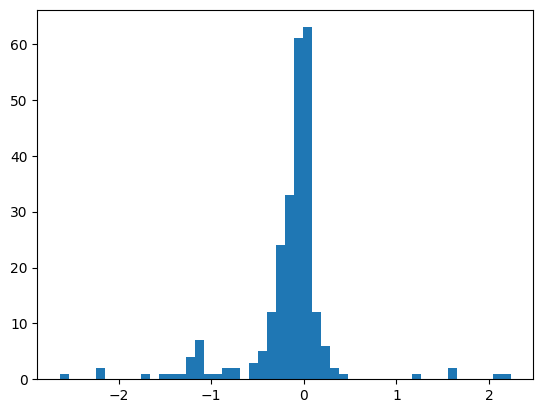

In [31]:
plt.hist(soa_df_final['mean_eyeX'], bins=50)

In [17]:
np.mean(soa_df_final['mean_eyeX'])

-0.939946041431602

In [18]:
soa_df_final['mean_eyeX'].quantile([0.25,0.5,0.75])

0.25   -1.204507
0.50   -0.186487
0.75    0.077191
Name: mean_eyeX, dtype: float64

(-5.0, 5.0)

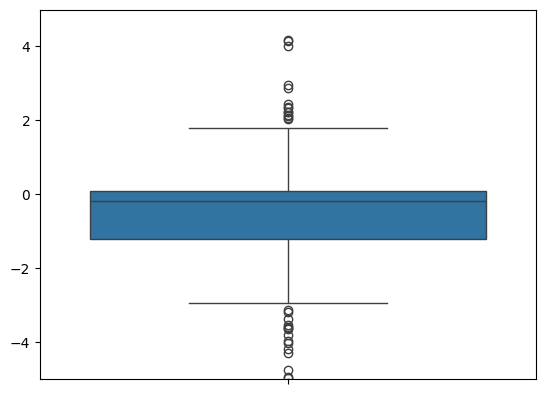

In [27]:
import seaborn as sns

ax = sns.boxplot(x)
ax.set_ylim([-5, 5])

In [11]:
soa_df_final

,soa,side,mean_eyeX,std_eyeX,n
0,-20.0,left,0.033325,0.008770,3
1,-20.0,right,-0.062871,0.111950,5
2,-10.0,left,-0.573565,2.903876,31
3,-10.0,right,0.005527,0.050650,23
4,-0.0,left,0.077140,0.421064,28
...,...,...,...,...,...
325,6900.0,right,NaN,NaN,0
326,7000.0,left,NaN,NaN,0
327,7000.0,right,NaN,NaN,0
328,7100.0,left,NaN,NaN,0


In [30]:
soa_values = np.unique(final_df['soa'].tolist())

soa = []
side = []
mean_eyeX = []
std_eyeX = []
n_soas = []

for i in soa_values:
    subset = final_df[final_df['soa'] == i]
    soa.append(i)
    soa.append(i)
    cue_left = subset[subset['cue'] == 6.0]
    n_left = len(cue_left)
    side.append('left')
    n_soas.append(n_left)
    cue_right = subset[subset['cue'] == 2.0]
    n_right = len(cue_right)
    side.append('right')
    n_soas.append(n_right)
    mean_left = np.mean(cue_left['x_std_mean'].tolist())
    mean_eyeX.append(mean_left)
    std_eyeX.append(np.std(cue_left['x_std_mean'].tolist()))
    mean_right = np.mean(cue_right['x_std_mean'].tolist())
    mean_eyeX.append(mean_right)
    std_eyeX.append(np.std(cue_right['x_std_mean'].tolist()))
    
soa_df_final = pd.DataFrame({'soa': soa, 'side': side, 'mean_eyeX': mean_eyeX, 'std_eyeX':std_eyeX, 'n':n_soas})

/home/marius/.virtualenvs/monkey_gf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/marius/.virtualenvs/monkey_gf/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/marius/.virtualenvs/monkey_gf/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/marius/.virtualenvs/monkey_gf/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/marius/.virtualenvs/monkey_gf/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [32]:
soi = [20, 50, 100, 200, 300, 400, 500] # soas of interest
soa = []
side = []
mean_eyeX = []
std_eyeX = []
n_soas = []

for i in range(len(soa_df_final)):
    if soa_df_final['soa'][i] in soi:
        soa.append(soa_df_final['soa'][i])
        side.append(soa_df_final['side'][i])
        mean_eyeX.append(soa_df_final['mean_eyeX'][i])
        std_eyeX.append(soa_df_final['std_eyeX'][i])
        n_soas.append(soa_df_final['n'][i])
        
df_analyze = pd.DataFrame({'soa': soa, 'side': side, 'mean_eyeX': mean_eyeX, 'std_eyeX':std_eyeX, 'n':n_soas})

In [33]:
df_analyze

,soa,side,mean_eyeX,std_eyeX,n
0,20.0,left,0.002429,0.093248,1157
1,20.0,right,-0.000921,0.157079,1225
2,50.0,left,-0.003084,0.250056,2258
3,50.0,right,-0.000719,0.195684,2161
4,100.0,left,0.000242,0.362748,1879
5,100.0,right,0.002679,0.314677,1879
6,200.0,left,-0.013212,0.576496,450
7,200.0,right,-0.098252,0.779659,462
8,300.0,left,-0.028117,0.582791,1038
9,300.0,right,-0.002506,0.624447,1073


/tmp/ipykernel_133960/1172370678.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.errorbar(df_analyze[df_analyze['side']=='left']['soa'].tolist(), df_analyze[soa_df_final['side']=='left']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='left']['std_eyeX'].tolist(), fmt='-o', label = 'Left gaze')
/tmp/ipykernel_133960/1172370678.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.errorbar(df_analyze[df_analyze['side']=='right']['soa'].tolist(), df_analyze[soa_df_final['side']=='right']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='right']['std_eyeX'].tolist(), fmt = '--o', label = 'Right gaze')


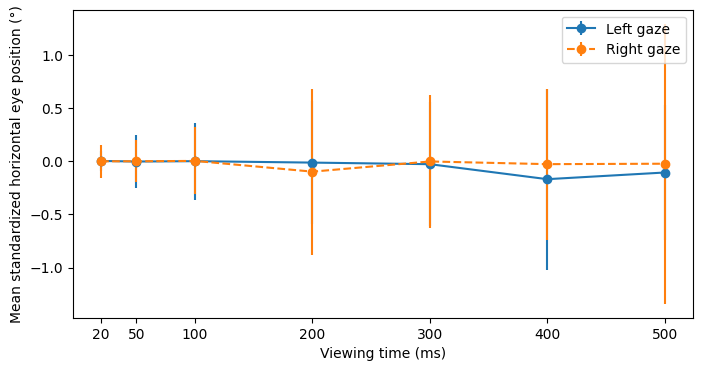

In [34]:
plt.figure(figsize=(8,4))
plt.errorbar(df_analyze[df_analyze['side']=='left']['soa'].tolist(), df_analyze[soa_df_final['side']=='left']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='left']['std_eyeX'].tolist(), fmt='-o', label = 'Left gaze')
plt.errorbar(df_analyze[df_analyze['side']=='right']['soa'].tolist(), df_analyze[soa_df_final['side']=='right']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='right']['std_eyeX'].tolist(), fmt = '--o', label = 'Right gaze')
plt.ylabel('Mean standardized horizontal eye position (°)')
plt.xticks(np.unique(df_analyze['soa']))
plt.xlabel('Viewing time (ms)')
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
plt.figure(figsize=(8,4))
plt.errorbar(df_analyze[df_analyze['side']=='left']['soa'].tolist(), df_analyze[soa_df_final['side']=='left']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='left']['std_eyeX'].tolist(), fmt='-o', label = 'Left gaze')
plt.errorbar(df_analyze[df_analyze['side']=='right']['soa'].tolist(), df_analyze[soa_df_final['side']=='right']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='right']['std_eyeX'].tolist(), fmt = '--o', label = 'Right gaze')
plt.ylabel('Mean standardized horizontal eye position (°)')
plt.xticks(np.unique(df_analyze['soa']))
plt.xlabel('Viewing time (ms)')
plt.legend(bbox_to_anchor=(1,1))

In [37]:
soa_df_final

,soa,side,mean_eyeX,std_eyeX,n
0,-20.0,left,0.033325,0.008770,3
1,-20.0,right,-0.062871,0.111950,5
2,-10.0,left,-0.044534,0.193584,30
3,-10.0,right,0.005527,0.050650,23
4,-0.0,left,0.077140,0.421064,28
...,...,...,...,...,...
309,6100.0,right,NaN,NaN,0
310,6500.0,left,NaN,NaN,0
311,6500.0,right,NaN,NaN,0
312,6600.0,left,NaN,NaN,0


In [39]:
import scipy

In [49]:
soi

[20, 50, 100, 200, 300, 400, 500]

In [51]:
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
for i in soi :
    U1, p = mannwhitneyu(soa_df_final[(soa_df_final['side']=='left') & (soa_df_final['soa']==i)]['mean_eyeX'].tolist(), 
                             soa_df_final[(soa_df_final['side']== 'right') & (soa_df_final['soa']==i)]['mean_eyeX'].tolist(), method='exact')
    print('SOA', i, 'p_value:',p)

SOA 20 p_value: 1.0
SOA 50 p_value: 1.0
SOA 100 p_value: 1.0
SOA 200 p_value: 1.0
SOA 300 p_value: 1.0
SOA 400 p_value: 1.0
SOA 500 p_value: 1.0


In [3]:
### EYE ONLY

os.chdir('/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/monkey_gf/data/eye_only/nrec')
final_df = pd.DataFrame({'filename': [], 'x_std_mean': [], 'x_values': [], 'cue': [], 'soa': [], 'baseline': []})

In [ ]:
for file in os.listdir():
    if file in details['filename'].tolist():
        print(file)
        mat_name = str(file)
    else:
        continue
        
    mat = scipy.io.loadmat(mat_name)
    session = details[details['filename']==mat_name]
    
    num_trials = mat['num_trials'][0][0]
    num_samples = len(mat['EyeX'])
    sampling_rate = mat['samplingRate'][0][0] # Hz
    time_vec = np.arange(num_samples) / sampling_rate 
    
    soa = mat['TrialList'][:, 11] # stimulus onset asynchrony
    isi = mat['TrialList'][:, 12] # inter stimulus interval
    cue_onset = int((0.1 + 0.5) * sampling_rate) # index
    target_onset = (cue_onset + (session['soa']*1000)).tolist()
        
    valid = session[(session['response_from_tracking'] == 2) | (session['response_from_tracking'] == 6)].reset_index(drop=True)
    valid_trials = valid['trial_id'].tolist()
    invalid = session[(session['response_from_tracking'] != 2) & (session['response_from_tracking'] != 6)] 
    invalid_trials = invalid['trial_id'].tolist()
    
    correct = valid[valid['got_reward'] == 1]
    incorrect = valid[valid['got_reward'] != 1]
    incorrect_trials = incorrect['trial_id'].tolist()

    congruent = valid[valid['cue_lum_congruency'] == True] 
    congruent_trials = congruent['trial_id'].tolist()
    incongruent = valid[valid['cue_lum_congruency'] == False] 
    incongruent_trials = incongruent['trial_id'].tolist()
    
    valid_trials = [i for i in valid_trials if i not in incorrect_trials or i not in invalid_trials]
    print('Amount of valid trials:', len(valid_trials))
    
   # if len(valid) > 0 and len(congruent) > 0 and len(incongruent) > 0:
   #     all_perf = len(correct)/len(valid) ## proportion of hits over hits and misses
   #     print('Overall performance [%]:', round(all_perf*100, 2))
   #     congru_perf = len(congruent[congruent['got_reward']==1])/len(congruent)
   #     print('Performance in congruent trials [%]:', round(congru_perf*100, 2))
   #     incongru_perf = len(incongruent[incongruent['got_reward']==1])/len(incongruent)
   #     print('Performance in incongruent trials [%]:', round(incongru_perf*100, 2), '\n')
   # else:
   #     continue
    
    right_cue_idx = [i for i, value in enumerate(session['cue_id']) if value == 2.0]
    left_cue_idx = [j for j, value in enumerate(session['cue_id']) if value == 6.0]
    
    ## Delete invalid trials
    for i in range(1, len(session)):
        if i in invalid_trials or i in incorrect_trials:
            if i in right_cue_idx:
                right_cue_idx.remove(i)
            elif i in left_cue_idx:
                left_cue_idx.remove(i)

            if i in congruent_trials:
                congruent_trials.remove(i)
            elif i in incongruent_trials:
                incongruent_trials.remove(i)

    # Eye data
    Xdata = mat['EyeX']
    Ydata = mat['EyeY']
    # Remove NaNs
    Xdata[np.isnan(Xdata)] = 0
    Ydata[np.isnan(Ydata)] = 0
    # Smooth
    Xdata_smoothed = savgol_filter(Xdata, 5, 2)
    Ydata_smoothed = savgol_filter(Ydata, 5, 2)
    
    valid['soa'] = valid['soa'] * 1000 # convert to ms
    
    # Standardize
    X_standard = []
    trial_info = []
    soa = []
    Xs = []
    stds = []
    baselines = []
    
    for i in range(len(valid)):
        trial_id = int(valid['trial_id'][i])
        target_on = int(target_onset[trial_id-1])
        baseline = Xdata_smoothed[cue_onset-1:cue_onset, trial_id-1]
        baselines.append(baseline)
        X_s = Xdata_smoothed[target_on-50:target_on, trial_id-1]
        Xs.append(X_s)
        corr_X = X_s - baseline # standardization
        corr_X_mean = np.nanmean(corr_X)
        X_standard.append(corr_X_mean)
        trial_info.append(valid['cue_id'][i])
        soa.append(valid['soa'][i])
    
    print('Soas', np.unique(soa), '\n')
    
    temp_df = pd.DataFrame({'filename':[mat_name]*len(X_standard), 'x_std_mean': X_standard, 'x_values':Xs, 'cue':trial_info, 'soa':soa, 'baseline': baselines})
    final_df = pd.concat([final_df,temp_df])

Emil_LED26_2023-04-18-11-03-58-095.mat


In [ ]:
final_df = final_df.reset_index(drop=True)
final_df

In [ ]:
os.chdir('/mnt/fileserv1_neurologie/Research_groups/mgoerner/projects/scientific/monkey_gf/analysis/weronika/horizontal_bias')
final_df.to_csv('horizontal_eyeonly.csv')

In [14]:
soa_values = np.unique(final_df['soa'].tolist())

soa = []
side = []
mean_eyeX = []
std_eyeX = []
n_soas = []

for i in soa_values:
    subset = final_df[final_df['soa'] == i]
    soa.append(i)
    soa.append(i)
    cue_left = subset[subset['cue'] == 6.0]
    n_left = len(cue_left)
    side.append('left')
    n_soas.append(n_left)
    cue_right = subset[subset['cue'] == 2.0]
    n_right = len(cue_right)
    side.append('right')
    n_soas.append(n_right)
    mean_left = np.mean(cue_left['x_std_mean'].tolist())
    mean_eyeX.append(mean_left)
    std_eyeX.append(np.std(cue_left['x_std_mean'].tolist()))
    mean_right = np.mean(cue_right['x_std_mean'].tolist())
    mean_eyeX.append(mean_right)
    std_eyeX.append(np.std(cue_right['x_std_mean'].tolist()))
    
soa_df_final = pd.DataFrame({'soa': soa, 'side': side, 'mean_eyeX': mean_eyeX, 'std_eyeX':std_eyeX, 'n':n_soas})

In [15]:
soi = [20, 50, 100, 200, 300, 400, 500] # soas of interest
soa = []
side = []
mean_eyeX = []
std_eyeX = []
n_soas = []

for i in range(len(soa_df_final)):
    if soa_df_final['soa'][i] in soi:
        soa.append(soa_df_final['soa'][i])
        side.append(soa_df_final['side'][i])
        mean_eyeX.append(soa_df_final['mean_eyeX'][i])
        std_eyeX.append(soa_df_final['std_eyeX'][i])
        n_soas.append(soa_df_final['n'][i])
        
df_analyze = pd.DataFrame({'soa': soa, 'side': side, 'mean_eyeX': mean_eyeX, 'std_eyeX':std_eyeX, 'n':n_soas})

In [16]:
df_analyze

,soa,side,mean_eyeX,std_eyeX,n
0,20.0,left,0.003186,0.219149,9014
1,20.0,right,-0.003155,0.228501,8954
2,50.0,left,0.008342,0.291229,3154
3,50.0,right,-0.012488,0.307650,3182
4,100.0,left,-0.004230,0.615537,11820
5,100.0,right,0.002186,0.618001,11642
6,200.0,left,0.007213,1.279211,9716
7,200.0,right,-0.008282,1.142369,9370
8,300.0,left,-0.020065,1.716912,9702
9,300.0,right,0.005793,1.909246,9808


/tmp/ipykernel_101515/204936535.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.errorbar(df_analyze[df_analyze['side']=='left']['soa'].tolist(), df_analyze[soa_df_final['side']=='left']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='left']['std_eyeX'].tolist(), fmt='-o', label = 'Left cue')
/tmp/ipykernel_101515/204936535.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.errorbar(df_analyze[df_analyze['side']=='right']['soa'].tolist(), df_analyze[soa_df_final['side']=='right']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='right']['std_eyeX'].tolist(), fmt = '--o', label = 'Right cue')


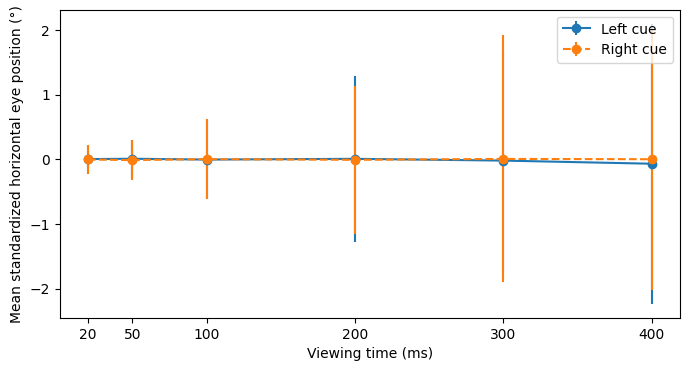

In [17]:
plt.figure(figsize=(8,4))
plt.errorbar(df_analyze[df_analyze['side']=='left']['soa'].tolist(), df_analyze[soa_df_final['side']=='left']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='left']['std_eyeX'].tolist(), fmt='-o', label = 'Left cue')
plt.errorbar(df_analyze[df_analyze['side']=='right']['soa'].tolist(), df_analyze[soa_df_final['side']=='right']['mean_eyeX'].tolist(), yerr = df_analyze[df_analyze['side']=='right']['std_eyeX'].tolist(), fmt = '--o', label = 'Right cue')
plt.ylabel('Mean standardized horizontal eye position (°)')
plt.xticks(np.unique(df_analyze['soa']))
plt.xlabel('Viewing time (ms)')
plt.legend(bbox_to_anchor=(1,1))

In [11]:
for i in soi :
    print(i, stats.ttest_ind(final_df[(final_df['cue']==2.0) & (final_df['soa']==i)]['x_std_mean'].tolist(), final_df[(final_df['cue']==6.0) & (final_df['soa']==i)]['x_std_mean'].tolist())[0])

20 -2.7240742691577915
50 -2.6506787900775155
100 0.5878188636472073
200 -0.7792864594913531
300 0.4856179238500062
400 1.436962495169195
500 nan
